In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.metrics import silhouette_score

import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import umap.umap_ as umap


In [2]:


pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)        # Don't break lines
pd.set_option('display.max_colwidth', None) # Show full content in each cell

In [3]:
df=joblib.load('df_clean.joblib')
print("Dataset Overview",df.head())
df.info()

Dataset Overview              Timestamp  Age  Gender         Country    state self_employed  \
0  2014-08-27 11:29:31   37  Female   United States       IL            No   
1  2014-08-27 11:29:37   44    Male   United States       IN            No   
2  2014-08-27 11:29:44   32    Male          Canada  Unknown            No   
3  2014-08-27 11:29:46   31    Male  United Kingdom  Unknown            No   
4  2014-08-27 11:30:22   31    Male   United States       TX            No   

  family_history treatment work_interfere  no_employees remote_work  \
0             No       Yes          Often            15          No   
1             No        No         Rarely          1000          No   
2             No        No         Rarely            15          No   
3            Yes       Yes          Often            63          No   
4             No        No          Never           300         Yes   

  tech_company    benefits care_options wellness_program   seek_help  \
0          Yes 

We need perform dimensionality reduction in order to get better clustering. For dimensionality reduction, Categorical columns need to be encoded or mapped and numerical columns also need to be scaled

In [4]:
#label encoder is used here in order to convert categorical columns to numerical columns
le=LabelEncoder()
ss=StandardScaler()
cat_cols=df.select_dtypes(include='object').columns
num_cols=df.select_dtypes(include='number').columns
df_encoded=df.copy()

for i in cat_cols:
    df_encoded[i]=le.fit_transform(df_encoded[i])

df_encoded[num_cols]=ss.fit_transform(df_encoded[num_cols])
#Viewing dataset after encoding and scaling
print(df_encoded.head())




   Timestamp       Age  Gender  Country  state  self_employed  family_history  \
0          0  0.858573       0       42      9              0               0   
1          1  2.024061       1       42     10              0               0   
2          2  0.026081       1        6     38              0               0   
3          3 -0.140417       1       41     38              0               1   
4          4 -0.140417       1       42     36              0               0   

   treatment  work_interfere  no_employees  remote_work  tech_company  \
0          1               1     -0.761070            0             1   
1          0               2      1.694950            0             0   
2          0               2     -0.761070            0             1   
3          1               1     -0.641385            0             1   
4          0               0     -0.050445            1             1   

   benefits  care_options  wellness_program  seek_help  anonymity  leave  

3 Techniques mainly used for dimensionality reduction
-Pca
-t-SNE
-UMAP
Let's apply them one by one and check which is the best for this dataset

In [5]:
#applying PCA
pca=PCA(n_components=2)
df_pca=pca.fit_transform(df_encoded)
df_pca = pd.DataFrame(df_pca, columns=['PC-1', 'PC-2'])

#applying t_SNE
t_sne=TSNE(n_components=2)
df_sne=t_sne.fit_transform(df_encoded)
df_sne = pd.DataFrame(df_sne, columns=['PC-1', 'PC-2'])

#applying umap
umap1=umap.UMAP(n_components=2)
df_umap=umap1.fit_transform(df_encoded)
df_umap = pd.DataFrame(df_umap, columns=['PC-1', 'PC-2'])

Visualization of reduction  techniques

Text(0.5, 1.0, 'umap')

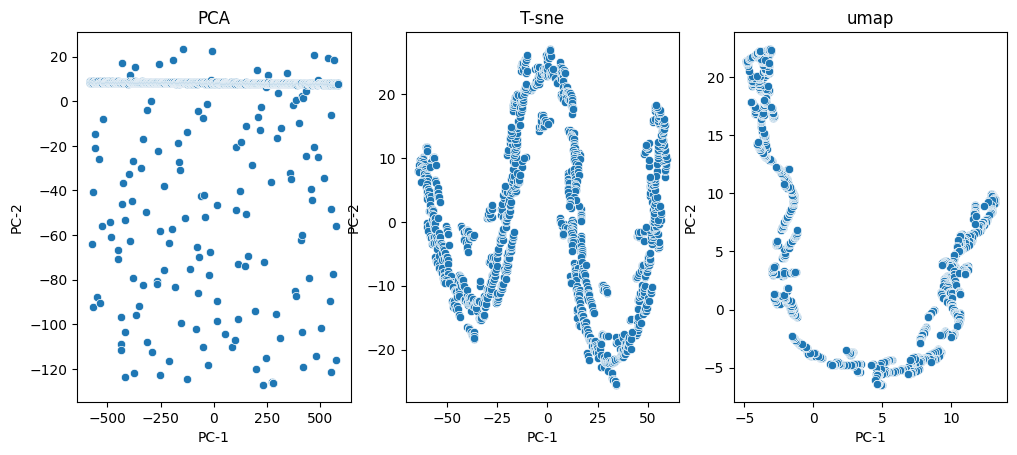

In [6]:
fig,axes=plt.subplots(1,3)
fig.set_figwidth(12,6)
#Pca visualization
sns.scatterplot(data=df_pca,x='PC-1',y='PC-2',ax=axes[0])
axes[0].set_title("PCA")

#t-SNE visualization
sns.scatterplot(data=df_sne,x='PC-1',y='PC-2',ax=axes[1])
axes[1].set_title("T-sne")

#Umap visualization
sns.scatterplot(data=df_umap,x='PC-1',y='PC-2',ax=axes[2])
axes[2].set_title("umap")



UMAP shows the clearest clusters

Identification of personas using Clustering techniques 
Step1-Finding the optimal number of clusters
Step2-Apply different clustering algorithms
Step3-Evaluating the best method of clustering

Method 1->K-Means

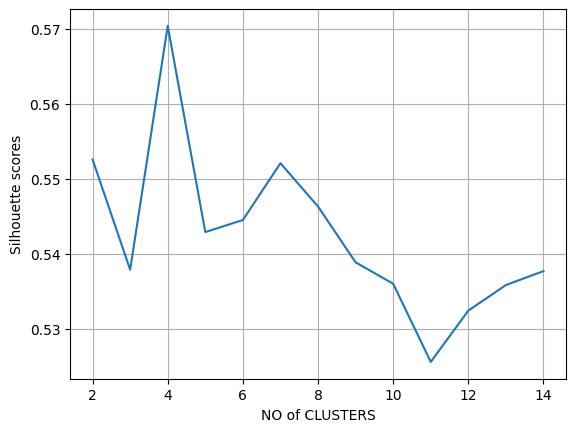

In [7]:
silhouette_scores=[]
cluster_range=list(range(2,15))
for i in cluster_range:
    kmeans=KMeans(n_clusters=i,random_state=42)
    labels=kmeans.fit_predict(df_umap)
    silhouette_scores.append(silhouette_score(df_umap,labels))

#Plotting graph in order to find the optimal no. of clusters
plt.plot(cluster_range,silhouette_scores)
plt.xlabel("NO of CLUSTERS")
plt.ylabel("Silhouette scores")
plt.grid()
plt.show()

In [8]:
#As we can see from the above graph that the optimal number of clusters is 4

#Finding via numpy.argmax
cluster_optimal=cluster_range[np.argmax(silhouette_scores)]
print("Optimal number of clusters:",cluster_optimal)

Optimal number of clusters: 4


In [9]:
kmeans=KMeans(n_clusters=cluster_optimal,random_state=42)
kmeans_labels=kmeans.fit_predict(df_umap)

Method-2 -> Agglomerative clustering

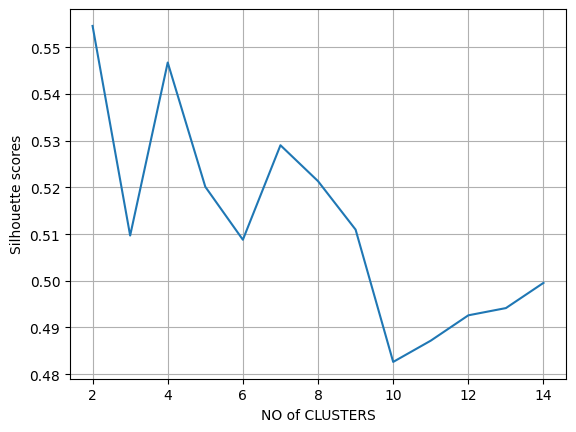

In [10]:
silhouette_scores=[]
cluster_range=list(range(2,15))
for i in cluster_range:
    AggClus=AgglomerativeClustering(n_clusters=i)
    labels=AggClus.fit_predict(df_umap)
    silhouette_scores.append(silhouette_score(df_umap,labels))

#Plotting graph in order to find the optimal no. of clusters
plt.plot(cluster_range,silhouette_scores)
plt.xlabel("NO of CLUSTERS")
plt.ylabel("Silhouette scores")
plt.grid()
plt.show()

In [ ]:


#Finding via numpy.argmax
cluster_optimal=cluster_range[np.argmax(silhouette_scores)]
print("Optimal number of clusters:",cluster_optimal)

Optimal number of clusters: 2


In [12]:
AggClus=AgglomerativeClustering(n_clusters=cluster_optimal)
agg_labels=AggClus.fit_predict(df_umap)

Method-3 ->DBSCAN(Density-Based Spatial Clustering of Applications with Noise)

In [13]:


    
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels=dbscan.fit_predict(df_umap)
    

In [14]:
#Finding the scores
k_means_score=silhouette_score(df_umap,kmeans_labels)
print("Score using K MEANS :",k_means_score)
agg_score=silhouette_score(df_umap,agg_labels)
print("Score using Agglomerative Clustering :",agg_score)

dbscan_scores=silhouette_score(df_umap,dbscan_labels)
print("Score using DBSCAN:",dbscan_scores)



Score using K MEANS : 0.5704114437103271
Score using Agglomerative Clustering : 0.5546134114265442
Score using DBSCAN: 0.4086267650127411


From the above scores, it can be seen that K Means is the best for clustering as it has the maximum silhouette score of 0.586

Text(0.5, 1.0, 'DBSCAN')

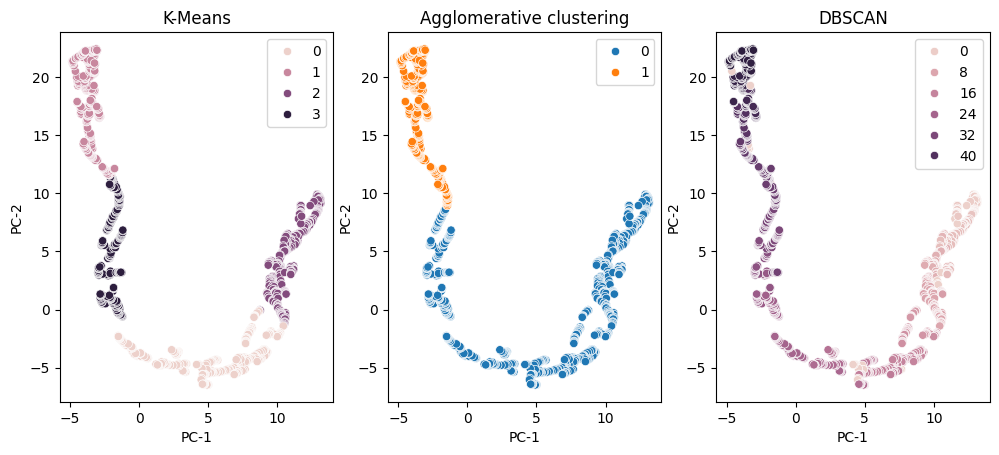

In [15]:
#Visulaization for different clustering algorithms

fig,axes=plt.subplots(1,3)
fig.set_figwidth(12,6)
#K-Means visualization
sns.scatterplot(data=df_umap,x='PC-1',y='PC-2',hue=kmeans_labels,ax=axes[0])
axes[0].set_title("K-Means")

#Agglomerative clustering
sns.scatterplot(data=df_umap,x='PC-1',y='PC-2',hue=agg_labels,ax=axes[1])
axes[1].set_title("Agglomerative clustering")

#DBSCAN visualization
sns.scatterplot(data=df_umap,x='PC-1',y='PC-2',hue=dbscan_labels,ax=axes[2])
axes[2].set_title("DBSCAN")

Now we have got different clusters for persona analysis

In [ ]:
df_transformed=df.copy()
df_transformed['cluster']=kmeans_labels

df_transformed.groupby('cluster').agg(lambda x: x.value_counts().index[0])

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2014-08-27 15:55:07,29,Male,United States,Unknown,No,No,Yes,Sometimes,1000,No,Yes,Yes,No,No,No,Don't know,Don't know,Maybe,No,Some of them,Yes,No,No,Don't know,No,Unknown
1,2016-02-01 23:04:31,32,Male,United States,Unknown,No,No,Yes,Sometimes,15,No,Yes,Yes,Yes,No,No,Don't know,Don't know,Maybe,No,Some of them,Yes,No,Maybe,Don't know,No,Unknown
2,2014-08-27 12:44:51,32,Male,United States,Unknown,No,No,No,Sometimes,15,No,Yes,Yes,No,No,No,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,Unknown
3,2014-08-28 09:59:39,29,Male,United States,Unknown,No,No,Yes,Sometimes,1000,No,Yes,Yes,No,No,No,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,Unknown


In [17]:
cluster_map={
    0:"Under supported professionals",
    1:"Open Advocates",
    2:"Mildly affected individual",
    3:"Silent Sufferers"
}

df_transformed['cluster']=df_transformed['cluster'].map(cluster_map)
df_transformed.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,cluster
0,2014-08-27 11:29:31,37,Female,United States,IL,No,No,Yes,Often,15,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,Unknown,Mildly affected individual
1,2014-08-27 11:29:37,44,Male,United States,IN,No,No,No,Rarely,1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,Unknown,Mildly affected individual
2,2014-08-27 11:29:44,32,Male,Canada,Unknown,No,No,No,Rarely,15,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,Unknown,Mildly affected individual
3,2014-08-27 11:29:46,31,Male,United Kingdom,Unknown,No,Yes,Yes,Often,63,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,Unknown,Mildly affected individual
4,2014-08-27 11:30:22,31,Male,United States,TX,No,No,No,Never,300,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,Unknown,Mildly affected individual


In [18]:
joblib.dump(df_transformed,"cluster.joblib")

['cluster.joblib']